In [ ]:
# Source code : Bradford council road crash details analysis
# Date Written : 30-11-2023 - 05-12-2023
# Programmer : Anish Vattemkuzhyil Appukuttan
# Description : This notebook does basic Descriptive Statistics, Environmental and human factors analysis, Temporal analysis
# data cleansing,identifying the major accident spots in bradford , logistic and Random forest Machine learning algorithms
# implementation in predicting the severity of accidents



In [111]:
import pandas as pd

# load the crashes data
df = pd.read_csv('C:/Users/44743/Desktop/Data Science/Bedford/bfd_crashes.csv')
print(df)


     accident_index  accident_year accident_reference  location_easting_osgr  \
0       2.01814E+12           2018          135110070                 411057   
1       2.01814E+12           2018          135111193                 411247   
2       2.01814E+12           2018          135121185                 410074   
3       2.01814E+12           2018          135131754                 406433   
4       2.01814E+12           2018          135131777                 418171   
...             ...            ...                ...                    ...   
2513  2020137CR1500           2020          137CR1500                 415446   
2514  2020137CS0741           2020          137CS0741                 417646   
2515  2020137CT0076           2020          137CT0076                 414800   
2516  2020137CT0659           2020          137CT0659                 412841   
2517  2020137CV1840           2020          137CV1840                 415316   

      location_northing_osgr  longitude

In [112]:
print(df.isnull().sum())

accident_index                                    0
accident_year                                     0
accident_reference                                0
location_easting_osgr                             0
location_northing_osgr                            0
longitude                                         0
latitude                                          0
police_force                                      0
accident_severity                                 0
number_of_vehicles                                0
number_of_casualties                              0
date                                              0
day_of_week                                       0
time                                              0
local_authority_district                          0
local_authority_ons_district                      0
local_authority_highway                           0
first_road_class                                  0
first_road_number                              1059
road_type   

In [113]:
import pandas as pd

# Loading the data frame
df = pd.read_csv('C:/Users/44743/Desktop/Data Science/Bedford/bfd_crashes.csv')


def convert_accident_index(value):
    try:
        # Check if value is in scientific notation by attempting to convert to float
        float_val = float(value)
        # Use string formatting to convert to full number string
        return '{:.0f}'.format(float_val)
    except ValueError:
        # If conversion fails, return the value as is
        return value

# Applying the conversion function to each value in the accident_index column
df['accident_index'] = df['accident_index'].apply(convert_accident_index)

# Displaying the first few rows to check
print(df['accident_index'].head())


0    2018140000000
1    2018140000000
2    2018140000000
3    2018140000000
4    2018140000000
Name: accident_index, dtype: object


In [114]:
df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,datetime
0,2018140000000,2018,135110070,411057,435169,-1.833560,53.812706,West Yorkshire,Slight,1,...,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01010672,2018-01-01T00:25:00Z
1,2018140000000,2018,135111193,411247,437980,-1.830573,53.837967,West Yorkshire,Serious,2,...,Daylight,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01010596,2018-01-01T12:20:00Z
2,2018140000000,2018,135121185,410074,442149,-1.848264,53.875461,West Yorkshire,Slight,1,...,Darkness - lighting unknown,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01010706,2018-01-02T16:50:00Z
3,2018140000000,2018,135131754,406433,441856,-1.903649,53.872885,West Yorkshire,Slight,2,...,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01010701,2018-01-03T17:31:00Z
4,2018140000000,2018,135131777,418171,430367,-1.725803,53.769349,West Yorkshire,Slight,2,...,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01010815,2018-01-03T21:23:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2020137CR1500,2020,137CR1500,415446,432588,-1.767034,53.789398,West Yorkshire,Slight,1,...,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01010834,2020-12-26T19:10:00Z
2514,2020137CS0741,2020,137CS0741,417646,427638,-1.733923,53.744839,West Yorkshire,Slight,1,...,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01011062,2020-12-28T14:34:00Z
2515,2020137CT0076,2020,137CT0076,414800,430027,-1.776961,53.766398,West Yorkshire,Slight,1,...,Darkness - lights lit,Fine no high winds,Frost or ice,None,None,Urban,Yes,Non-trunk,E01010848,2020-12-29T01:05:00Z
2516,2020137CT0659,2020,137CT0659,412841,430244,-1.806670,53.768400,West Yorkshire,Slight,2,...,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01010755,2020-12-26T19:30:00Z


In [115]:
df['first_road_number']

0       first_road_class is C or Unclassified. These r...
1                                                     NaN
2       first_road_class is C or Unclassified. These r...
3       first_road_class is C or Unclassified. These r...
4       first_road_class is C or Unclassified. These r...
                              ...                        
2513    first_road_class is C or Unclassified. These r...
2514                                                  NaN
2515    first_road_class is C or Unclassified. These r...
2516    first_road_class is C or Unclassified. These r...
2517    first_road_class is C or Unclassified. These r...
Name: first_road_number, Length: 2518, dtype: object

In [116]:
df['second_road_class']

0                NaN
1       Unclassified
2                NaN
3                NaN
4       Unclassified
            ...     
2513    Unclassified
2514    Unclassified
2515               B
2516    Unclassified
2517    Unclassified
Name: second_road_class, Length: 2518, dtype: object

In [117]:
df['second_road_number']

0                                                 Unknown
1       first_road_class is C or Unclassified. These r...
2                                                 Unknown
3                                                 Unknown
4       first_road_class is C or Unclassified. These r...
                              ...                        
2513    first_road_class is C or Unclassified. These r...
2514    first_road_class is C or Unclassified. These r...
2515                                                  NaN
2516    first_road_class is C or Unclassified. These r...
2517    first_road_class is C or Unclassified. These r...
Name: second_road_number, Length: 2518, dtype: object

In [118]:
#Droping those NaN columns from the data frame as it seems to be not important


df.drop(['first_road_number', 'second_road_class', 'second_road_number'], axis=1, inplace=True)




In [119]:
df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,datetime
0,2018140000000,2018,135110070,411057,435169,-1.833560,53.812706,West Yorkshire,Slight,1,...,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01010672,2018-01-01T00:25:00Z
1,2018140000000,2018,135111193,411247,437980,-1.830573,53.837967,West Yorkshire,Serious,2,...,Daylight,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01010596,2018-01-01T12:20:00Z
2,2018140000000,2018,135121185,410074,442149,-1.848264,53.875461,West Yorkshire,Slight,1,...,Darkness - lighting unknown,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01010706,2018-01-02T16:50:00Z
3,2018140000000,2018,135131754,406433,441856,-1.903649,53.872885,West Yorkshire,Slight,2,...,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01010701,2018-01-03T17:31:00Z
4,2018140000000,2018,135131777,418171,430367,-1.725803,53.769349,West Yorkshire,Slight,2,...,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01010815,2018-01-03T21:23:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2020137CR1500,2020,137CR1500,415446,432588,-1.767034,53.789398,West Yorkshire,Slight,1,...,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01010834,2020-12-26T19:10:00Z
2514,2020137CS0741,2020,137CS0741,417646,427638,-1.733923,53.744839,West Yorkshire,Slight,1,...,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01011062,2020-12-28T14:34:00Z
2515,2020137CT0076,2020,137CT0076,414800,430027,-1.776961,53.766398,West Yorkshire,Slight,1,...,Darkness - lights lit,Fine no high winds,Frost or ice,None,None,Urban,Yes,Non-trunk,E01010848,2020-12-29T01:05:00Z
2516,2020137CT0659,2020,137CT0659,412841,430244,-1.806670,53.768400,West Yorkshire,Slight,2,...,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01010755,2020-12-26T19:30:00Z


In [120]:
print(df.isnull().sum())

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
road_type                                      0
speed_limit                                    0
junction_detail     

In [121]:

columns = df.columns
print(columns)

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'road_type',
       'speed_limit', 'junction_detail', 'junction_control',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'datetime'],
      dtype='object')


In [122]:
print(df.describe())

       accident_year  location_easting_osgr  location_northing_osgr  \
count    2518.000000            2518.000000             2518.000000   
mean     2018.894758          414173.163225           434953.262510   
std         0.811398            4110.045092             4422.822804   
min      2018.000000          398755.000000           416827.000000   
25%      2018.000000          412954.000000           432164.000000   
50%      2019.000000          415193.000000           433844.500000   
75%      2020.000000          417014.750000           437293.250000   
max      2020.000000          429827.000000           449873.000000   

         longitude     latitude  number_of_vehicles  number_of_casualties  \
count  2518.000000  2518.000000         2518.000000           2518.000000   
mean     -1.786278    53.810676            1.778396              1.330421   
std       0.062350     0.039800            0.681892              0.825952   
min      -2.020403    53.647796            1.000000 

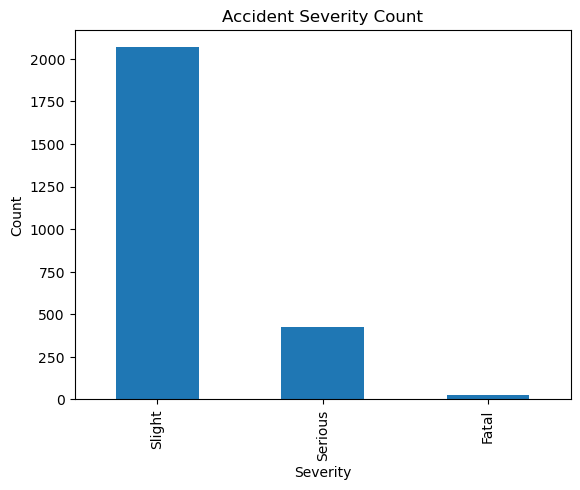

In [123]:
#Accident Severity Analysis
import matplotlib.pyplot as plt

# Accident severity count
df['accident_severity'].value_counts().plot(kind='bar')
plt.title('Accident Severity Count')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()


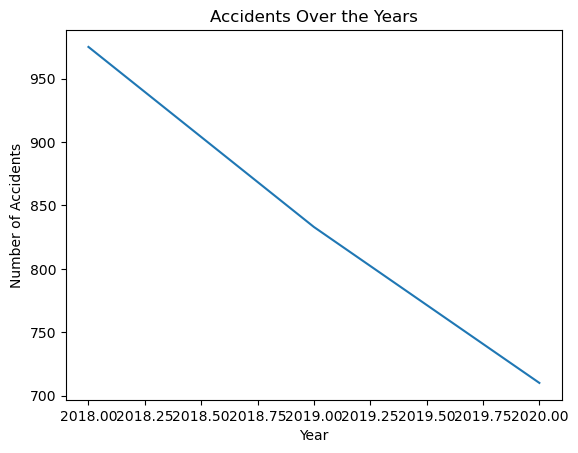

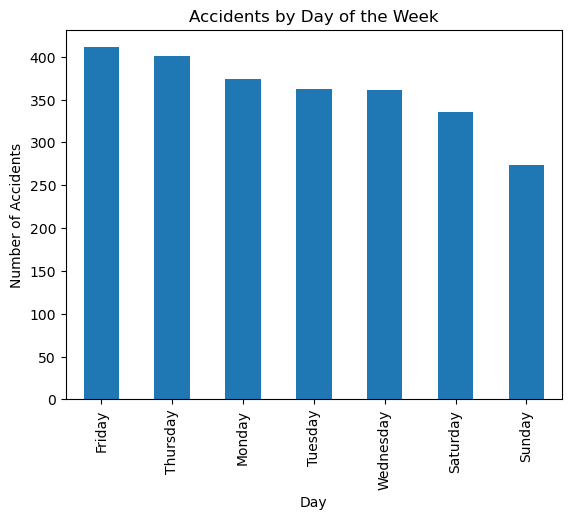

In [124]:
#Temporal Analysis - Analyze accidents over time (year, day of the week, time of the day)

# Accidents by year
df['accident_year'].value_counts().sort_index().plot(kind='line')
plt.title('Accidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

# Accidents by day of the week
df['day_of_week'].value_counts().plot(kind='bar')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()



In [125]:
#Finding1 : Accidents are more on Friday and this is because Friday is generally be the busiest day in a week.

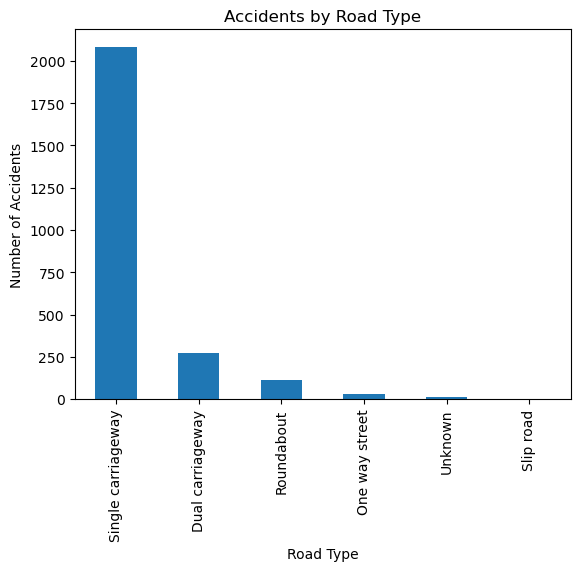

In [126]:
# Road type and accidents
df['road_type'].value_counts().plot(kind='bar')
plt.title('Accidents by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.show()


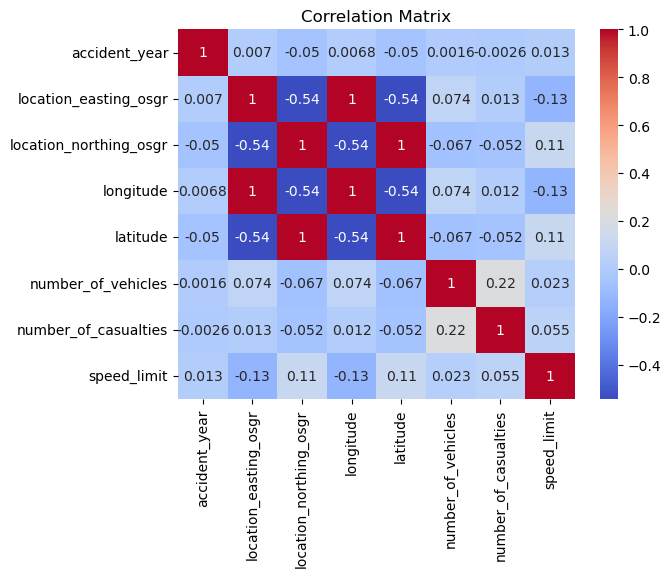

In [127]:
import seaborn as sns

# Correlation matrix heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [128]:
#Pearson correlation
##### Finding 2 : The speed_limit has a very low to negligible correlation with most variables, suggesting no strong linear relationship with the geographic location of accidents or the number of vehicles involved


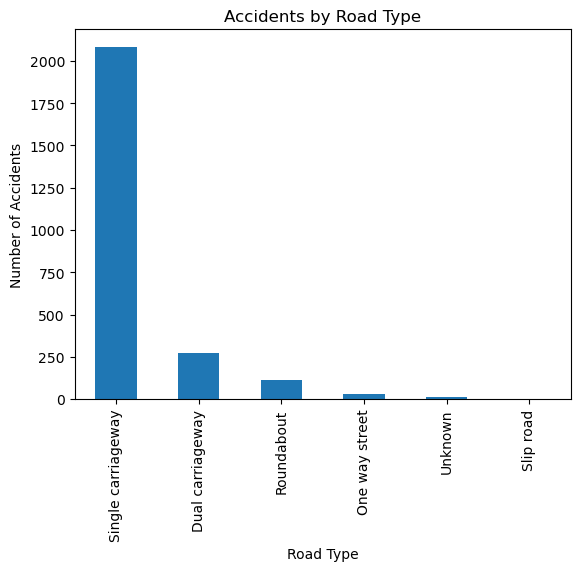

In [129]:
#Analysis of Road type

df['road_type'].value_counts().plot(kind='bar')
plt.title('Accidents by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.show()


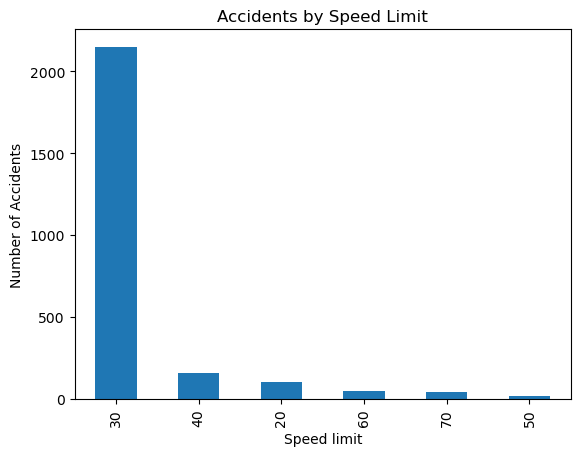

In [130]:
#Analysis of speed limit

df['speed_limit'].value_counts().plot(kind='bar')
plt.title('Accidents by Speed Limit')
plt.xlabel('Speed limit')
plt.ylabel('Number of Accidents')
plt.show()


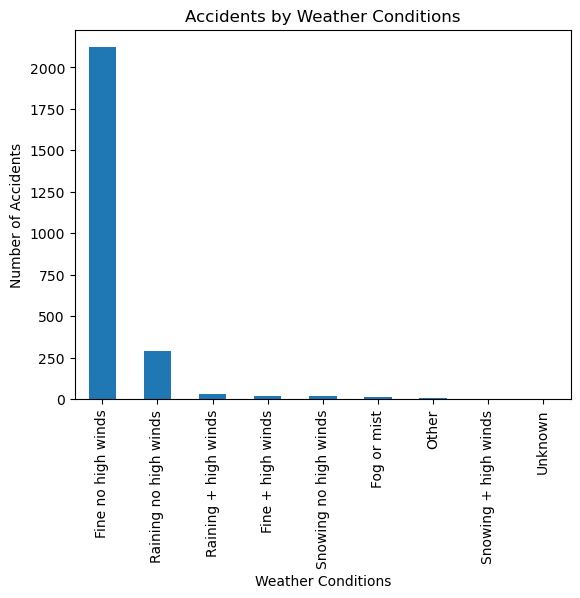

In [131]:
df['weather_conditions'].value_counts().plot(kind='bar')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.show()

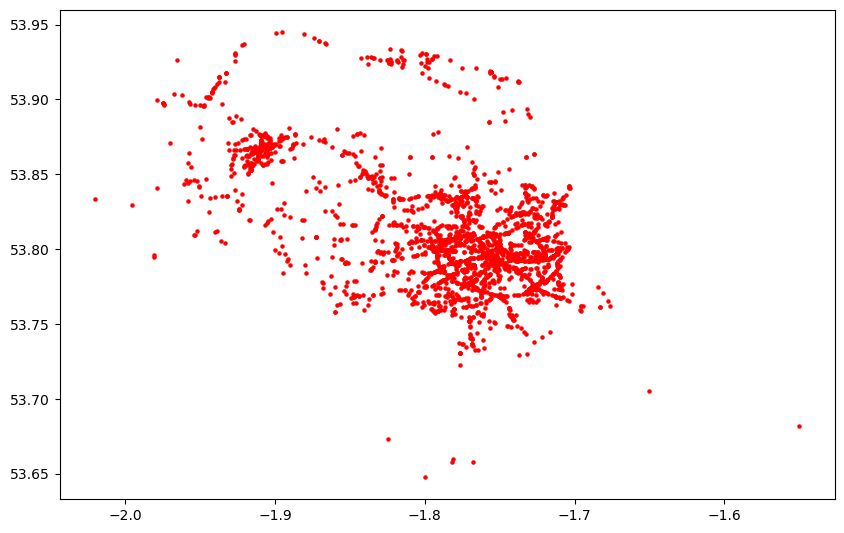

In [132]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Converting the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=5, color='red')


# base = gpd.read_file('path_to_basemap.shp').plot(ax=ax, color='gray')

plt.show()


In [133]:
df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,datetime
0,2018140000000,2018,135110070,411057,435169,-1.833560,53.812706,West Yorkshire,Slight,1,...,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01010672,2018-01-01T00:25:00Z
1,2018140000000,2018,135111193,411247,437980,-1.830573,53.837967,West Yorkshire,Serious,2,...,Daylight,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01010596,2018-01-01T12:20:00Z
2,2018140000000,2018,135121185,410074,442149,-1.848264,53.875461,West Yorkshire,Slight,1,...,Darkness - lighting unknown,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01010706,2018-01-02T16:50:00Z
3,2018140000000,2018,135131754,406433,441856,-1.903649,53.872885,West Yorkshire,Slight,2,...,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01010701,2018-01-03T17:31:00Z
4,2018140000000,2018,135131777,418171,430367,-1.725803,53.769349,West Yorkshire,Slight,2,...,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01010815,2018-01-03T21:23:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2020137CR1500,2020,137CR1500,415446,432588,-1.767034,53.789398,West Yorkshire,Slight,1,...,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01010834,2020-12-26T19:10:00Z
2514,2020137CS0741,2020,137CS0741,417646,427638,-1.733923,53.744839,West Yorkshire,Slight,1,...,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01011062,2020-12-28T14:34:00Z
2515,2020137CT0076,2020,137CT0076,414800,430027,-1.776961,53.766398,West Yorkshire,Slight,1,...,Darkness - lights lit,Fine no high winds,Frost or ice,None,None,Urban,Yes,Non-trunk,E01010848,2020-12-29T01:05:00Z
2516,2020137CT0659,2020,137CT0659,412841,430244,-1.806670,53.768400,West Yorkshire,Slight,2,...,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01010755,2020-12-26T19:30:00Z


In [134]:
df['police_force'].unique()

array(['West Yorkshire'], dtype=object)

In [135]:
import pandas as pd
import geopandas as gpd
from sklearn.cluster import DBSCAN
import folium
from folium.plugins import HeatMap


df = pd.read_csv('C:/Users/44743/Desktop/Data Science/Bedford/bfd_crashes.csv')

# Converting the DataFrame to a GeoDataFrame

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Defining the location for West Yorkshire
west_yorkshire_coords = [53.8008, -1.5491]  # Latitude and longitude for West Yorkshire

# Creating a folium map centered around West Yorkshire
map = folium.Map(location=west_yorkshire_coords, zoom_start=10)

# Creating a HeatMap layer and add it to the base map
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry]
HeatMap(heat_data).add_to(map)

# Applying DBSCAN to identify clusters
coords = gdf[['latitude', 'longitude']]
db = DBSCAN(eps=0.001, min_samples=10).fit(coords)  
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])

# Adding the cluster centers to the map
for cluster in clusters:
    if not cluster.empty:
        folium.Marker(
            location=[cluster.latitude.mean(), cluster.longitude.mean()],
            icon=folium.Icon(color='blue', icon='info-sign'),
            popup=f"Cluster Center\nCount: {len(cluster)}",
        ).add_to(map)

# Save the map to an HTML file
map.save('west_yorkshire_accident_heatmap3.html')



In [136]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np


df = pd.read_csv('C:/Users/44743/Desktop/Data Science/Bedford/bfd_crashes.csv')


coords = df[['latitude', 'longitude']]

# Running DBSCAN
db = DBSCAN(eps=0.01, min_samples=10)  
clusters = db.fit_predict(coords)


cluster_sizes = pd.Series(clusters).value_counts().sort_values(ascending=False)

# Get the top 5 clusters
top_clusters = cluster_sizes.head(5).index

# Finding the central coordinates of the top 5 clusters
top_cluster_coords = pd.DataFrame(coords).groupby(clusters).mean().loc[top_clusters]

print(top_cluster_coords)


     latitude  longitude
 0  53.798059  -1.762121
 1  53.866369  -1.909107
-1  53.839544  -1.854113
 5  53.769639  -1.848852
 6  53.905200  -1.942457


In [137]:
#Reverse geocoding

In [138]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Initializing the geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

# Use rate limiter to avoid overloading the API service
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)


coordinates = [
    (53.798059, -1.762121),
    (53.866369, -1.909107),
    (53.839544, -1.854113),
    (53.769639, -1.848852),
    (53.905200, -1.942457)
]

# Retrieving place names
place_names = []
for coord in coordinates:
    location = geocode(coord)
    place_names.append(location.address if location else "Not Found")

# Print out the place names
for place, coord in zip(place_names, coordinates):
    print(f"Coordinates: {coord} - Place Name: {place}")


Coordinates: (53.798059, -1.762121) - Place Name: Westgate, Manningham, Bradford, West Yorkshire, England, BD1 3AD, United Kingdom
Coordinates: (53.866369, -1.909107) - Place Name: Airedale Shopping Centre, Queensway, Keighley, Long Lee, Bradford, West Yorkshire, England, BD21 3PY, United Kingdom
Coordinates: (53.839544, -1.854113) - Place Name: Harden Grange Riding School, Harden Road, Priestthorpe, Bingley, Harden, Bradford, West Yorkshire, England, BD16 1AX, United Kingdom
Coordinates: (53.769639, -1.848852) - Place Name: Chapel Lane, Queensbury, Bradford, West Yorkshire, England, BD13 2PZ, United Kingdom
Coordinates: (53.9052, -1.942457) - Place Name: Keighley Road, Silsden, Steeton, Bradford, West Yorkshire, England, BD20 0EH, United Kingdom


In [139]:
df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'datetime'],
      dtype='object')

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder



# Binary classification for 'accident_severity' (1 for serious, 0 for slight)
df['accident_severity'] = df['accident_severity'].apply(lambda x: 1 if x == 'Serious' else 0)

# Feature selection (dropping some columns that are not useful or are identifiers)
X = df.drop(['accident_index', 'accident_reference', 'accident_severity', 'datetime'], axis=1)

# Encoding categorical variables
X = pd.get_dummies(X)

# Labels
y = df['accident_severity']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature importances
feature_importances = rf_classifier.feature_importances_


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       430
           1       0.50      0.01      0.03        74

    accuracy                           0.85       504
   macro avg       0.68      0.51      0.47       504
weighted avg       0.80      0.85      0.79       504

Accuracy: 0.8531746031746031


In [141]:
# Applying SMOTE to avoid class imbalance as class '1' ( Severe accidents- precision only 50%)

In [142]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score




# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())


rf_classifier = RandomForestClassifier(random_state=42)


rf_classifier.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))




Before SMOTE: 0    1665
1     349
Name: accident_severity, dtype: int64
After SMOTE: 0    1665
1    1665
Name: accident_severity, dtype: int64
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       430
           1       0.16      0.05      0.08        74

    accuracy                           0.82       504
   macro avg       0.51      0.50      0.49       504
weighted avg       0.75      0.82      0.78       504

Accuracy: 0.8194444444444444


In [143]:
# Below entire RFE is been commented because each time we run the entire notebook, it takes too much time for execution.
#from sklearn.feature_selection import RFE
#from sklearn.ensemble import RandomForestClassifier
#import pandas as pd



# Initializing the Random Forest Classifier
#rf_classifier = RandomForestClassifier(random_state=42)

# Creating the RFE object
# The number of features to select can be set with the n_features_to_select parameter
#rfe = RFE(estimator=rf_classifier, n_features_to_select=10)  

# Fit RFE
#rfe.fit(X, y)

# Checking selected features
#selected_features = rfe.support_

# Geting the ranking of the features. The lower the rank, the more important the feature
#feature_ranking = rfe.ranking_

# Geting the names of the top features
#top_features = X.columns[selected_features]

#print("Selected Features: ", top_features)
#print("Feature Ranking: ", feature_ranking)


#X_filtered = X[top_features]


In [144]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'junction_control' column
df['junction_control'] = label_encoder.fit_transform(df['junction_control'])

# Display the modified DataFrame
print(df[['junction_control']].head())


   junction_control
0                 2
1                 3
2                 2
3                 2
4                 3
